Suponha que não soubéssemos quantas espécies diferentes estão presentes no dataset iris. Como poderíamos descobrir essa informação aproximadamente a partir dos dados presentes ali?

Uma solução possível seria plotar os dados em um scatterplot e tentar identificar visualmente a existência de grupos distintos. O datase Iris, no entanto, possui quatro dimensões de dados então não é possível visualizá-lo inteiramente (apenas um par de features por vez).

Para visualizar o dataset completo como um scatterplot 2D, é possível usar técnicas de **redução de dimensionalidade** para comprimir o dataset para duas dimensões perdendo pouca informação estrutural.

## Leitura dos dados

In [1]:
import pandas as pd

iris = pd.read_csv('../datasets/iris_without_classes.csv') # Carregue o arquivo 'datasets/iris_without_classes.csv' 

In [2]:
# Exiba as primeiras cinco linhas usando o método head() para checar que não existe mais a coluna "Class"
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Redução de dimensões

Usaremos o algoritmo [PCA do scikit-learn](http://scikit-learn.org/stable/modules/decomposition.html#pca) para reduzir o número de dimenSões para dois no dataset.

In [3]:
# Use PCA's fit_transform() method to reduce the dataset size to two dimensions
from sklearn.decomposition import PCA

RANDOM_STATE=1234
pca = PCA(n_components=2, random_state=RANDOM_STATE) # Crie um objeto PCA com dois componentes
iris_2d = pca.fit_transform(iris) # Use o método fit_transform() para reduzir o dataset para duas dimensões

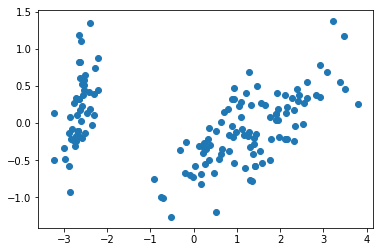

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Crie um scatterplot do dataset reduzido
plt.scatter(iris_2d[:, 0], iris_2d[:, 1])
# Exiba o gráfico
plt.show()

Quantos grupos distintos você consegue identificar?

## Descoberta de clusters com K-Means

O problem descrito anteriormente pode ser descrito como um problema de **Clusterização**. Clusterização permite encontrar grupos de exemplos que sejam semelhantes a outros exemplos no mesmo grupo mas diferentes de exemplos pertencentes a outros grupos.

Neste exemplo, usaremos o algoritmo [KMeans do scikit-learn](http://scikit-learn.org/stable/modules/clustering.html#k-means) para encontrar cluster no dataset.

Uma limitação do KMeans é que ele precisa receber o número esperado de clusters como argumento, então é necessário que se tenha algum conhecimento daquele domínio para chutar um número razoável de grupos ou pode-se testar diferentes números de clusters e ver qual deles apresenta o melhor resultado.

In [5]:
# Crie dois modelos KMeans: um com dois clusters e outro com três clusters
# Armazene os identificadores previstos pelos modelos usando dois e três clusters
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=2, random_state=RANDOM_STATE).fit(iris) # Crie um objeto KMeans que espere dois clusters
labels2 = model2.predict(iris) # Infira o identificador de cluster de cada exemplo no dataset usando predict()

model3 = KMeans(n_clusters=3, random_state=RANDOM_STATE).fit(iris) # Crie um objeto KMeans que espere três clusters
labels3 = model3.predict(iris) # Infira o identificador de cluster de cada exemplo no dataset usando predict()

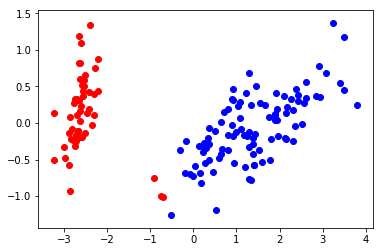

In [6]:
# Crie um scatterplot usando o dataset reduzido colorindo cada ponto de acordo com o cluster
# ao qual ele pertence segundo o KMeans de dois clusters
plt.scatter(iris_2d[labels2 == 0, 0], iris_2d[labels2 == 0, 1], color='red')
plt.scatter(iris_2d[labels2 == 1, 0], iris_2d[labels2 == 1, 1], color='blue')
# Exiba o scatterplot
plt.show()

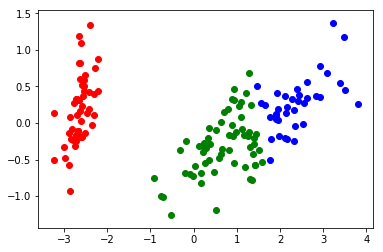

In [7]:
# Crie um scatterplot usando o dataset reduzido colorindo cada ponto de acordo com o cluster
# ao qual ele pertence segundo o KMeans de três clusters
plt.scatter(iris_2d[labels3 == 0, 0], iris_2d[labels3 == 0, 1], color='red')
plt.scatter(iris_2d[labels3 == 1, 0], iris_2d[labels3 == 1, 1], color='blue')
plt.scatter(iris_2d[labels3 == 2, 0], iris_2d[labels3 == 2, 1], color='green')
# Exiba o scatterplot
plt.show()

## Recursos adicionais

Existem técnicas como Análise de Silhueta para inferir automaticamente o número ótimo de clusters em um dataset. [Este link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) ilustra com um exemplo como essa técnica pode ser implementada usando o scikit-learn.

Em relação a redução de dimensionalidade, PCA é uma das técnicas mais usadas em experimentos iniciais. Algumas alternativas comuns ao KMeans e PCA são, respectivamente, [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) e [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Para uma excelente explicação interativa sobre o t-SNE, veja [esse link](http://distill.pub/2016/misread-tsne/).